In [16]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

% matplotlib inline

In [17]:
def DFT_loop(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    return [sum([x[i]*(Wn**(i*j)) for i in range(N)]) for j in range(N)]

In [18]:
def IDFT_loop(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    return [sum([x[i]*(Wn**(-i*j))/N for i in range(N)]) for j in range(N)]

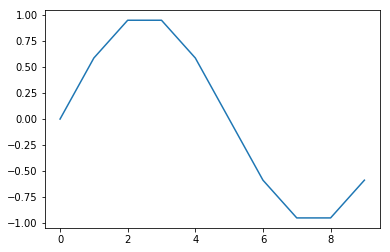

In [19]:
f = 10
N = 10
t = np.linspace(0, 1/f, N+1)[:-1]
x = np.sin(2*np.pi*t*f)

plt.plot(x)

In [20]:
% time
dft_loop = DFT_loop(x)
x_loop = IDFT_loop(dft_loop)

Wall time: 0 ns


C:\DSP\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


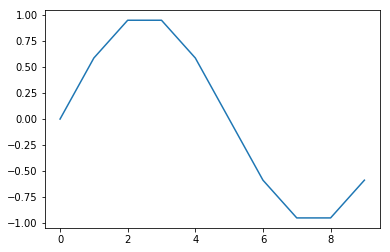

In [21]:
plt.plot(x_loop)

In [7]:
def DFT_mat(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    l_w = Wn**np.arange(N)
    D = (l_w.reshape(-1,1))**np.arange(N)
    return D.dot(x)

In [8]:
def IDFT_mat(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    l_w = Wn**np.arange(0, -N, -1)
    D = (l_w.reshape(-1,1))**np.arange(N)
    return D.dot(x)

In [9]:
% time
dft_mat = DFT_mat(x)
x_mat = IDFT_mat(dft_mat)

Wall time: 0 ns


C:\DSP\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


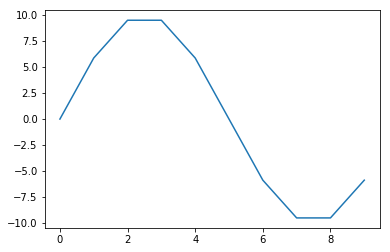

In [10]:
plt.plot(x_mat)

In [11]:
def make_x(N, f = 10):
    t = np.linspace(0, 1/f, N+1)[:-1]
    x = np.sin(2*np.pi*t*f)
    return x

In [12]:
def time_loop(f = 10):
    t = []
    for i in range(5, 25):
        x = make_x(i, f)
        start = time()
        temp = DFT_loop(x)
        end = time()
        t.append(end-start)
    return t

In [13]:
def time_mat(f = 10):
    t = []
    for i in range(5, 25):
        x = make_x(i, f)
        start = time()
        temp = DFT_mat(x)
        end = time()
        t.append(end-start)
    return t

In [14]:
t_loop = time_loop()
t_mat = time_mat()

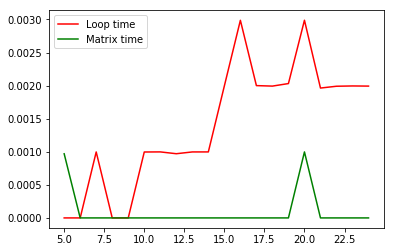

In [15]:
plt.plot(range(5, 25), t_loop, 'red')
plt.plot(range(5, 25), t_mat, 'green')
plt.legend(['Loop time', 'Matrix time'])